<a href="https://colab.research.google.com/github/StanleyLiangYork/2024_journal_club_Transformer_AI/blob/main/Recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This demo notebook is the implementation of a recurrent neural network (RNN) with TensorFlow.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import numpy as np

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Then we create a simple RNN to predict the stock market.
The stock price with be sequence of three consecutive days, so the input shape is 3-by-1.

To simplify the work, we use linear activation so that f(x)=x, no change at the output. The simple RNN has two hidden units, and the outputs of the RNN are connected to a dense layer with one unit (one neuron).

In [2]:
hidden_units = 2
dense_units = 1
input_shape = (3, 1)
activations = ['linear', 'linear']

simRNN_model = create_RNN(hidden_units, dense_units, input_shape, activations)

wx = simRNN_model.get_weights()[0]
wh = simRNN_model.get_weights()[1]
bh = simRNN_model.get_weights()[2]
wy = simRNN_model.get_weights()[3]
by = simRNN_model.get_weights()[4]

print('Input shape:', wx.shape)
print('RNN weight shape:', wh.shape)
print('Bias shape:', bh.shape)
print('Weight for dense layer shape:', wy.shape)
print('Bias for dense layer shape:', by.shape)


Input shape: (1, 2)
RNN weight shape: (2, 2)
Bias shape: (2,)
Weight for dense layer shape: (2, 1)
Bias for dense layer shape: (1,)


In [3]:
print("check the random initiated weights")
print(f"hidden units: {wx}")
print(f"weights for hidden units: {wh}")
print(f"weights for bias: {bh}")
print(f"weights for dense: {by}")
print(f"weights for dense bias: {by}")

check the random initiated weights
hidden units: [[-0.40088665  0.24589586]]
weights for hidden units: [[ 0.11468196 -0.99340224]
 [ 0.99340224  0.11468196]]
weights for bias: [0. 0.]
weights for dense: [0.]
weights for dense bias: [0.]


The data flow can be illustrated as:
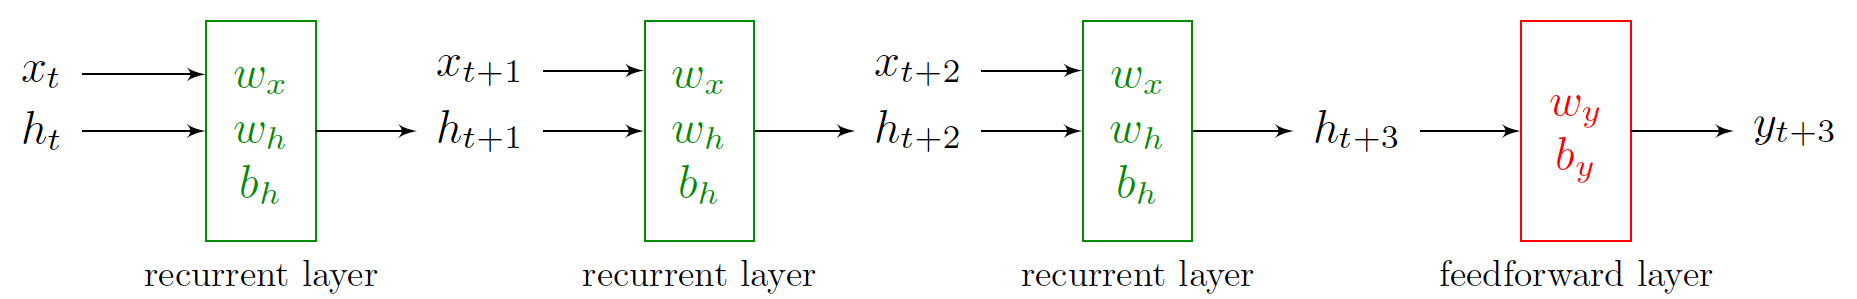

In [4]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features
x_input = np.reshape(x,(1, 3, 1))
print(x_input)

y_pred_model = simRNN_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 =', h1,'h2 =', h2,'h3 =', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)


[[[1]
  [2]
  [3]]]
1/1 [==============================] - 1s 893ms/step
h1 = [[-0.40088665  0.24589586]] h2 = [[-0.60347428  0.91823325]] h3 = [[-0.35969261  1.44248507]]
Prediction from network  [[1.158829]]
Prediction from our computation  [[1.15882888]]


Let's try some real data

In [5]:
import math

from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
# slice the sequence into 12-point fragments paired with the 13th-point as the ground true
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values')



Epoch 1/20
187/187 - 2s - loss: 0.1003 - 2s/epoch - 8ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0578 - 606ms/epoch - 3ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0459 - 652ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0386 - 663ms/epoch - 4ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0333 - 722ms/epoch - 4ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0293 - 470ms/epoch - 3ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0261 - 408ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0239 - 408ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0217 - 441ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0199 - 420ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0185 - 440ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0172 - 406ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0162 - 397ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0151 - 410ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0143 - 413ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.01

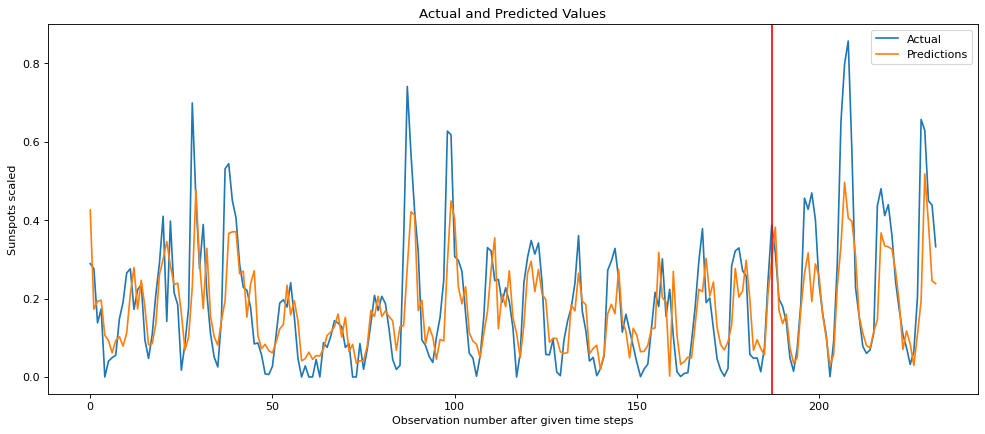

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
time_steps = 12
train_data, test_data, data = get_train_test(url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)